In [8]:
!pip install matplotlib

You should consider upgrading via the 'c:\users\frank_sellhausen\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


In [9]:
!pip install seaborn

You should consider upgrading via the 'c:\users\frank_sellhausen\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.



  Using cached seaborn-0.11.2-py3-none-any.whl (292 kB)


In [10]:
# import all of my packages

import warnings
warnings.filterwarnings('ignore')   # to avoid warnings

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt 
%matplotlib inline
import seaborn as sns
sns.set(style="darkgrid")

# Executive Summary

## Methodology

In [11]:
# Import my dataset (csv file) and give it an alias: df1
# Operations results in a Pandas dataframe being created

df1 = pd.read_csv('CardioGoodFitness.csv')
type(df1)

pandas.core.frame.DataFrame

In [12]:
# Lets take a look at the shape 

df1.shape

(180, 9)

In [13]:
df1.head(10)

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,18,Male,14,Single,3,4,29562,112
1,TM195,19,Male,15,Single,2,3,31836,75
2,TM195,19,Female,14,Partnered,4,3,30699,66
3,TM195,19,Male,12,Single,3,3,32973,85
4,TM195,20,Male,13,Partnered,4,2,35247,47
5,TM195,20,Female,14,Partnered,3,3,32973,66
6,TM195,21,Female,14,Partnered,3,3,35247,75
7,TM195,21,Male,13,Single,3,3,32973,85
8,TM195,21,Male,15,Single,5,4,35247,141
9,TM195,21,Female,15,Partnered,2,3,37521,85


In [14]:
df1.tail(10)

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
170,TM798,31,Male,16,Partnered,6,5,89641,260
171,TM798,33,Female,18,Partnered,4,5,95866,200
172,TM798,34,Male,16,Single,5,5,92131,150
173,TM798,35,Male,16,Partnered,4,5,92131,360
174,TM798,38,Male,18,Partnered,5,5,104581,150
175,TM798,40,Male,21,Single,6,5,83416,200
176,TM798,42,Male,18,Single,5,4,89641,200
177,TM798,45,Male,16,Single,5,5,90886,160
178,TM798,47,Male,18,Partnered,4,5,104581,120
179,TM798,48,Male,18,Partnered,4,5,95508,180


In [15]:
df1.sample(10)

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
31,TM195,25,Male,16,Single,3,4,40932,113
140,TM798,22,Male,14,Single,4,3,48658,106
91,TM498,23,Female,16,Partnered,3,2,43206,74
76,TM195,44,Female,16,Single,3,4,57987,75
21,TM195,23,Male,16,Single,4,3,40932,94
115,TM498,31,Male,16,Partnered,3,3,52302,95
128,TM498,35,Female,14,Partnered,3,2,52302,53
120,TM498,33,Male,13,Partnered,4,4,53439,170
45,TM195,28,Female,16,Partnered,2,3,52302,66
96,TM498,24,Female,16,Single,3,3,50028,106


In [17]:
# So we have a relatively small dataset
# I would like to view the whole dataset within my notebook

# pd.options.display.max_rows = 200
# print(df1)

In [18]:
# could also accomplish by printing to a string

# print(df1.to_string())

In [5]:
# Lets get the info to start gleaning some insights
# We have 9 total columns that contain information pertaining
# to a product and the demographics of people who purchased the product

df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [87]:
# I assume that I have a relatively clean dataset
# If I needed to clean before processing, I could accomplish
# this with Pandas as well
# Use dropna() to drop null columns, if appropriate
# Use fillna() to replace values, if appropriate
# Specify column to operate on: 
#   df['col_name'].fillna(value_to_fill, inplace=True)
#   common way to replace missing values: mean, median, mode

# Also pay attention to data formats here
#   may need to covert certain data types

# Access data points by indexing and update values, if needed
#   df.loc[row_index, 'col_name'] = value_to_replace

# Beware of duplicates
#print(df1.duplicated()) # check for duplicate values

# If we found duplicate values, we can remove with Pandas
# df.drop_duplicates(inplace = True)


In [ ]:
# Using a loop to replace values: 
# for x in df.index:
#   if df.loc[x, "col_name"] > value:
#     df.loc[x, "col_name"] = value 

# Using a loop to drop rows:
# for x in df.index:
#   if df.loc[x, "col_name"] > value:
#     df.drop(x, inplace = True)

In [78]:
df1.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


In [79]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,180.0,28.788889,6.943498,18.0,24.00,26.0,33.00,50.0
Education,180.0,15.572222,1.617055,12.0,14.00,16.0,16.00,21.0
Usage,180.0,3.455556,1.084797,2.0,3.00,3.0,4.00,7.0
Fitness,180.0,3.311111,0.958869,1.0,3.00,3.0,4.00,5.0
Income,180.0,53719.577778,16506.684226,29562.0,44058.75,50596.5,58668.00,104581.0
Miles,180.0,103.194444,51.863605,21.0,66.00,94.0,114.75,360.0


In [6]:
# If I had only wanted to look at datatypes:

df1.dtypes

Product          object
Age               int64
Gender           object
Education         int64
MaritalStatus    object
Usage             int64
Fitness           int64
Income            int64
Miles             int64
dtype: object

In [19]:
# lets take a look at our columns so we know what we are dealing with

df1.columns.values

array(['Product', 'Age', 'Gender', 'Education', 'MaritalStatus', 'Usage',
       'Fitness', 'Income', 'Miles'], dtype=object)

In [8]:
# I would like to see for col in df1
# I would like to select several columns that I want to view
# and list the unique values

list_col=['Product','MaritalStatus','Usage','Fitness','Education','Age']
for col in list_col: 
    print('{} :{} ' . format(col.capitalize(),df1[col].unique()))

Product :['TM195' 'TM498' 'TM798'] 
Maritalstatus :['Single' 'Partnered'] 
Usage :[3 2 4 5 6 7] 
Fitness :[4 3 2 1 5] 
Education :[14 15 12 13 16 18 20 21] 
Age :[18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41
 43 44 46 47 50 45 48 42] 


In [9]:
# But what if I had a large dataset and I want to view all columns?!
# I definitely wouldn't want to list them all out
# I will use the tolist method to capture column names this time

un_col_list = df1.columns.values.tolist()
for col in un_col_list:
    print('{} :{}' .format(col.capitalize(), df1[col].unique()))

Product :['TM195' 'TM498' 'TM798']
Age :[18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41
 43 44 46 47 50 45 48 42]
Gender :['Male' 'Female']
Education :[14 15 12 13 16 18 20 21]
Maritalstatus :['Single' 'Partnered']
Usage :[3 2 4 5 6 7]
Fitness :[4 3 2 1 5]
Income :[ 29562  31836  30699  32973  35247  37521  36384  38658  40932  34110
  39795  42069  44343  45480  46617  48891  53439  43206  52302  51165
  50028  54576  68220  55713  60261  67083  56850  59124  61398  57987
  64809  47754  65220  62535  48658  54781  48556  58516  53536  61006
  57271  52291  49801  62251  64741  70966  75946  74701  69721  83416
  88396  90886  92131  77191  52290  85906 103336  99601  89641  95866
 104581  95508]
Miles :[112  75  66  85  47 141 103  94 113  38 188  56 132 169  64  53 106  95
 212  42 127  74 170  21 120 200 140 100  80 160 180 240 150 300 280 260
 360]


In [31]:
# Let's use a df method to count our unique values! 

df1.nunique()

Product           3
Age              32
Gender            2
Education         8
MaritalStatus     2
Usage             6
Fitness           5
Income           62
Miles            37
dtype: int64

In [34]:
df1.mean()

Age             28.788889
Education       15.572222
Usage            3.455556
Fitness          3.311111
Income       53719.577778
Miles          103.194444
dtype: float64

In [36]:
df1.median()

Age             26.0
Education       16.0
Usage            3.0
Fitness          3.0
Income       50596.5
Miles           94.0
dtype: float64

In [40]:
df1.std()

Age              6.943498
Education        1.617055
Usage            1.084797
Fitness          0.958869
Income       16506.684226
Miles           51.863605
dtype: float64

In [42]:
df1['Product'].value_counts()

TM195    80
TM498    60
TM798    40
Name: Product, dtype: int64

<AxesSubplot:ylabel='Product'>

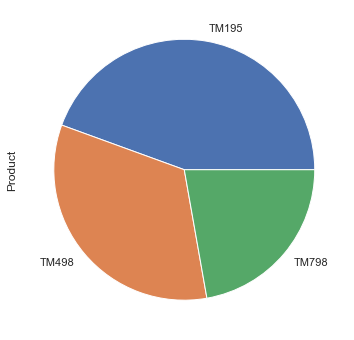

In [44]:
df1['Product'].value_counts().plot(kind='pie', figsize=(6,6))

<AxesSubplot:ylabel='Density'>

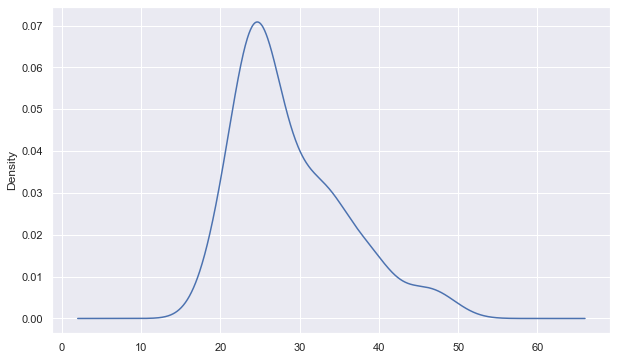

In [48]:
df1['Age'].plot(kind='kde', figsize=(10,6))

<AxesSubplot:ylabel='Frequency'>

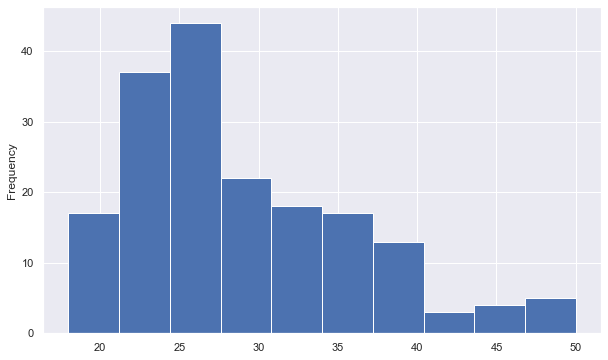

In [47]:
df1['Age'].plot(kind='hist', figsize=(10,6))

In [49]:
# the printout above is a bit messy though
# I would like to look further into my products column

print("My unique products are: ", df1['Product'].unique())

My unique products are:  ['TM195' 'TM498' 'TM798']


In [51]:
df1.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,18,Male,14,Single,3,4,29562,112
1,TM195,19,Male,15,Single,2,3,31836,75
2,TM195,19,Female,14,Partnered,4,3,30699,66
3,TM195,19,Male,12,Single,3,3,32973,85
4,TM195,20,Male,13,Partnered,4,2,35247,47


In [54]:
corr = df1.corr()
corr

,Age,Education,Usage,Fitness,Income,Miles
Age,1.000000,0.280496,0.015064,0.061105,0.513414,0.036618
Education,0.280496,1.000000,0.395155,0.410581,0.625827,0.307284
Usage,0.015064,0.395155,1.000000,0.668606,0.519537,0.759130
Fitness,0.061105,0.410581,0.668606,1.000000,0.535005,0.785702
Income,0.513414,0.625827,0.519537,0.535005,1.000000,0.543473
Miles,0.036618,0.307284,0.759130,0.785702,0.543473,1.000000


In [17]:
df1.groupby(['Product', 'Gender']).mean(['Income', 'Usage', 'Education'])

Age  Education     Usage   Fitness        Income  \
Product Gender                                                           
TM195   Female  28.450000  15.100000  2.900000  2.875000  46020.075000   
        Male    28.650000  14.975000  3.275000  3.050000  46815.975000   
TM498   Female  29.103448  15.206897  3.137931  2.862069  49336.448276   
        Male    28.709677  15.032258  3.000000  2.935484  48634.258065   
TM798   Female  27.000000  17.857143  5.000000  4.571429  73633.857143   
        Male    29.545455  17.212121  4.727273  4.636364  75825.030303   

                     Miles  
Product Gender              
TM195   Female   76.200000  
        Male     89.375000  
TM498   Female   87.344828  
        Male     88.483871  
TM798   Female  180.000000  
        Male    164.121212

In [18]:
# Lets turn this into a pivot table
# Pivot tables - the Swiss Army Knife of data analysis! 

pd.pivot_table(df1, index=['Product'])

,Age,Education,Fitness,Income,Miles,Usage
Product,,,,,,
TM195,28.55,15.037500,2.9625,46418.025,82.787500,3.087500
TM498,28.90,15.116667,2.9000,48973.650,87.933333,3.066667
TM798,29.10,17.325000,4.6250,75441.575,166.900000,4.775000


In [58]:
pd.pivot_table(df1, index=['Product', 'Gender'])

Age  Education   Fitness        Income       Miles  \
Product Gender                                                             
TM195   Female  28.450000  15.100000  2.875000  46020.075000   76.200000   
        Male    28.650000  14.975000  3.050000  46815.975000   89.375000   
TM498   Female  29.103448  15.206897  2.862069  49336.448276   87.344828   
        Male    28.709677  15.032258  2.935484  48634.258065   88.483871   
TM798   Female  27.000000  17.857143  4.571429  73633.857143  180.000000   
        Male    29.545455  17.212121  4.636364  75825.030303  164.121212   

                   Usage  
Product Gender            
TM195   Female  2.900000  
        Male    3.275000  
TM498   Female  3.137931  
        Male    3.000000  
TM798   Female  5.000000  
        Male    4.727273

In [30]:
pd.pivot_table(df1, index=['Product', 'Gender'], values=['Usage'])

Usage
Product Gender          
TM195   Female  2.900000
        Male    3.275000
TM498   Female  3.137931
        Male    3.000000
TM798   Female  5.000000
        Male    4.727273

In [21]:
pd.pivot_table(df1, index=['Product', 'Gender'], values=['Usage', 'Fitness'])

Fitness     Usage
Product Gender                    
TM195   Female  2.875000  2.900000
        Male    3.050000  3.275000
TM498   Female  2.862069  3.137931
        Male    2.935484  3.000000
TM798   Female  4.571429  5.000000
        Male    4.636364  4.727273

In [22]:
df1.to_excel("CardioGood.xlsx")

In [39]:
#pd.crosstab(df1, df1.Product, df1.Gender, aggfunc = ["mean", "max"])

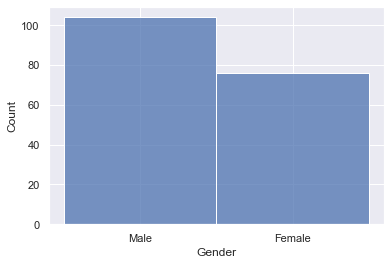

In [24]:
# I would like to start visualizing some of my data now
# I will start with some basic plots to understand the distribution
# of my data

sns.histplot(df1['Gender']); 

<AxesSubplot:xlabel='Gender', ylabel='count'>

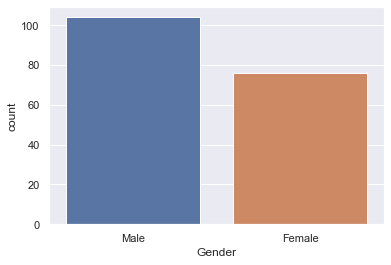

In [80]:
sns.countplot(df1['Gender'])

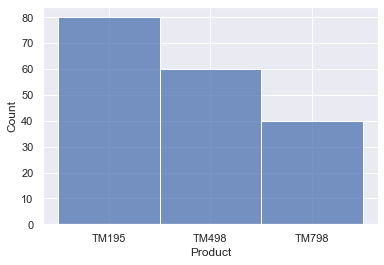

In [25]:
sns.histplot(df1['Product']); 

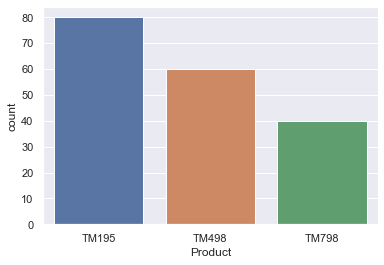

In [82]:
sns.countplot(df1['Product']); 

<AxesSubplot:xlabel='Usage', ylabel='Density'>

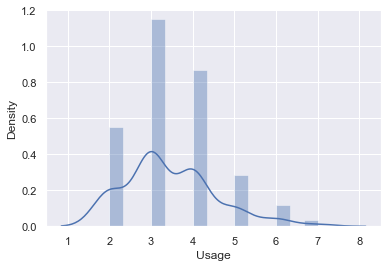

In [26]:
# Note that the columns will sum to 1
# This doesn't give us count like a histogram

sns.distplot(df1['Usage'])

# If we want the count, we can uncomment the script below
#sns.histplot(df1['Usage'])

<AxesSubplot:xlabel='Income', ylabel='Density'>

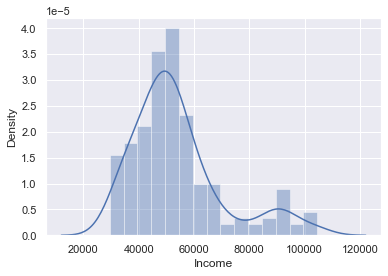

In [27]:
sns.distplot(df1['Income'])

<AxesSubplot:xlabel='Age', ylabel='Density'>

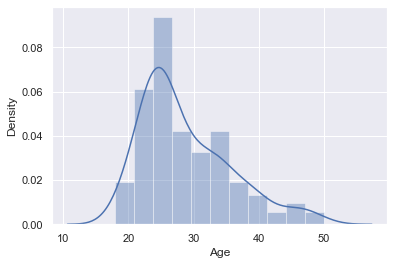

In [28]:
sns.distplot(df1['Age'])

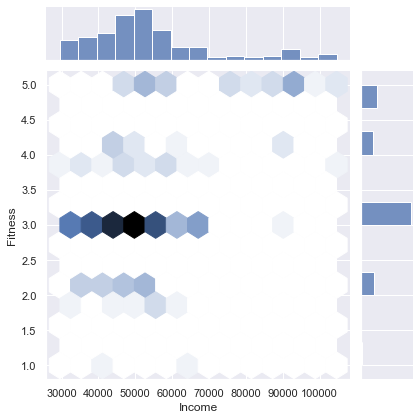

In [29]:
sns.jointplot(data = df1, x = 'Income', y = 'Fitness', kind = 'hex');

## A note on box plots

We can use box plots to view how our data is distributed

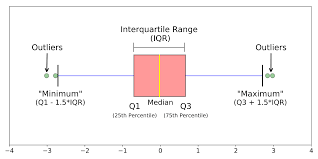

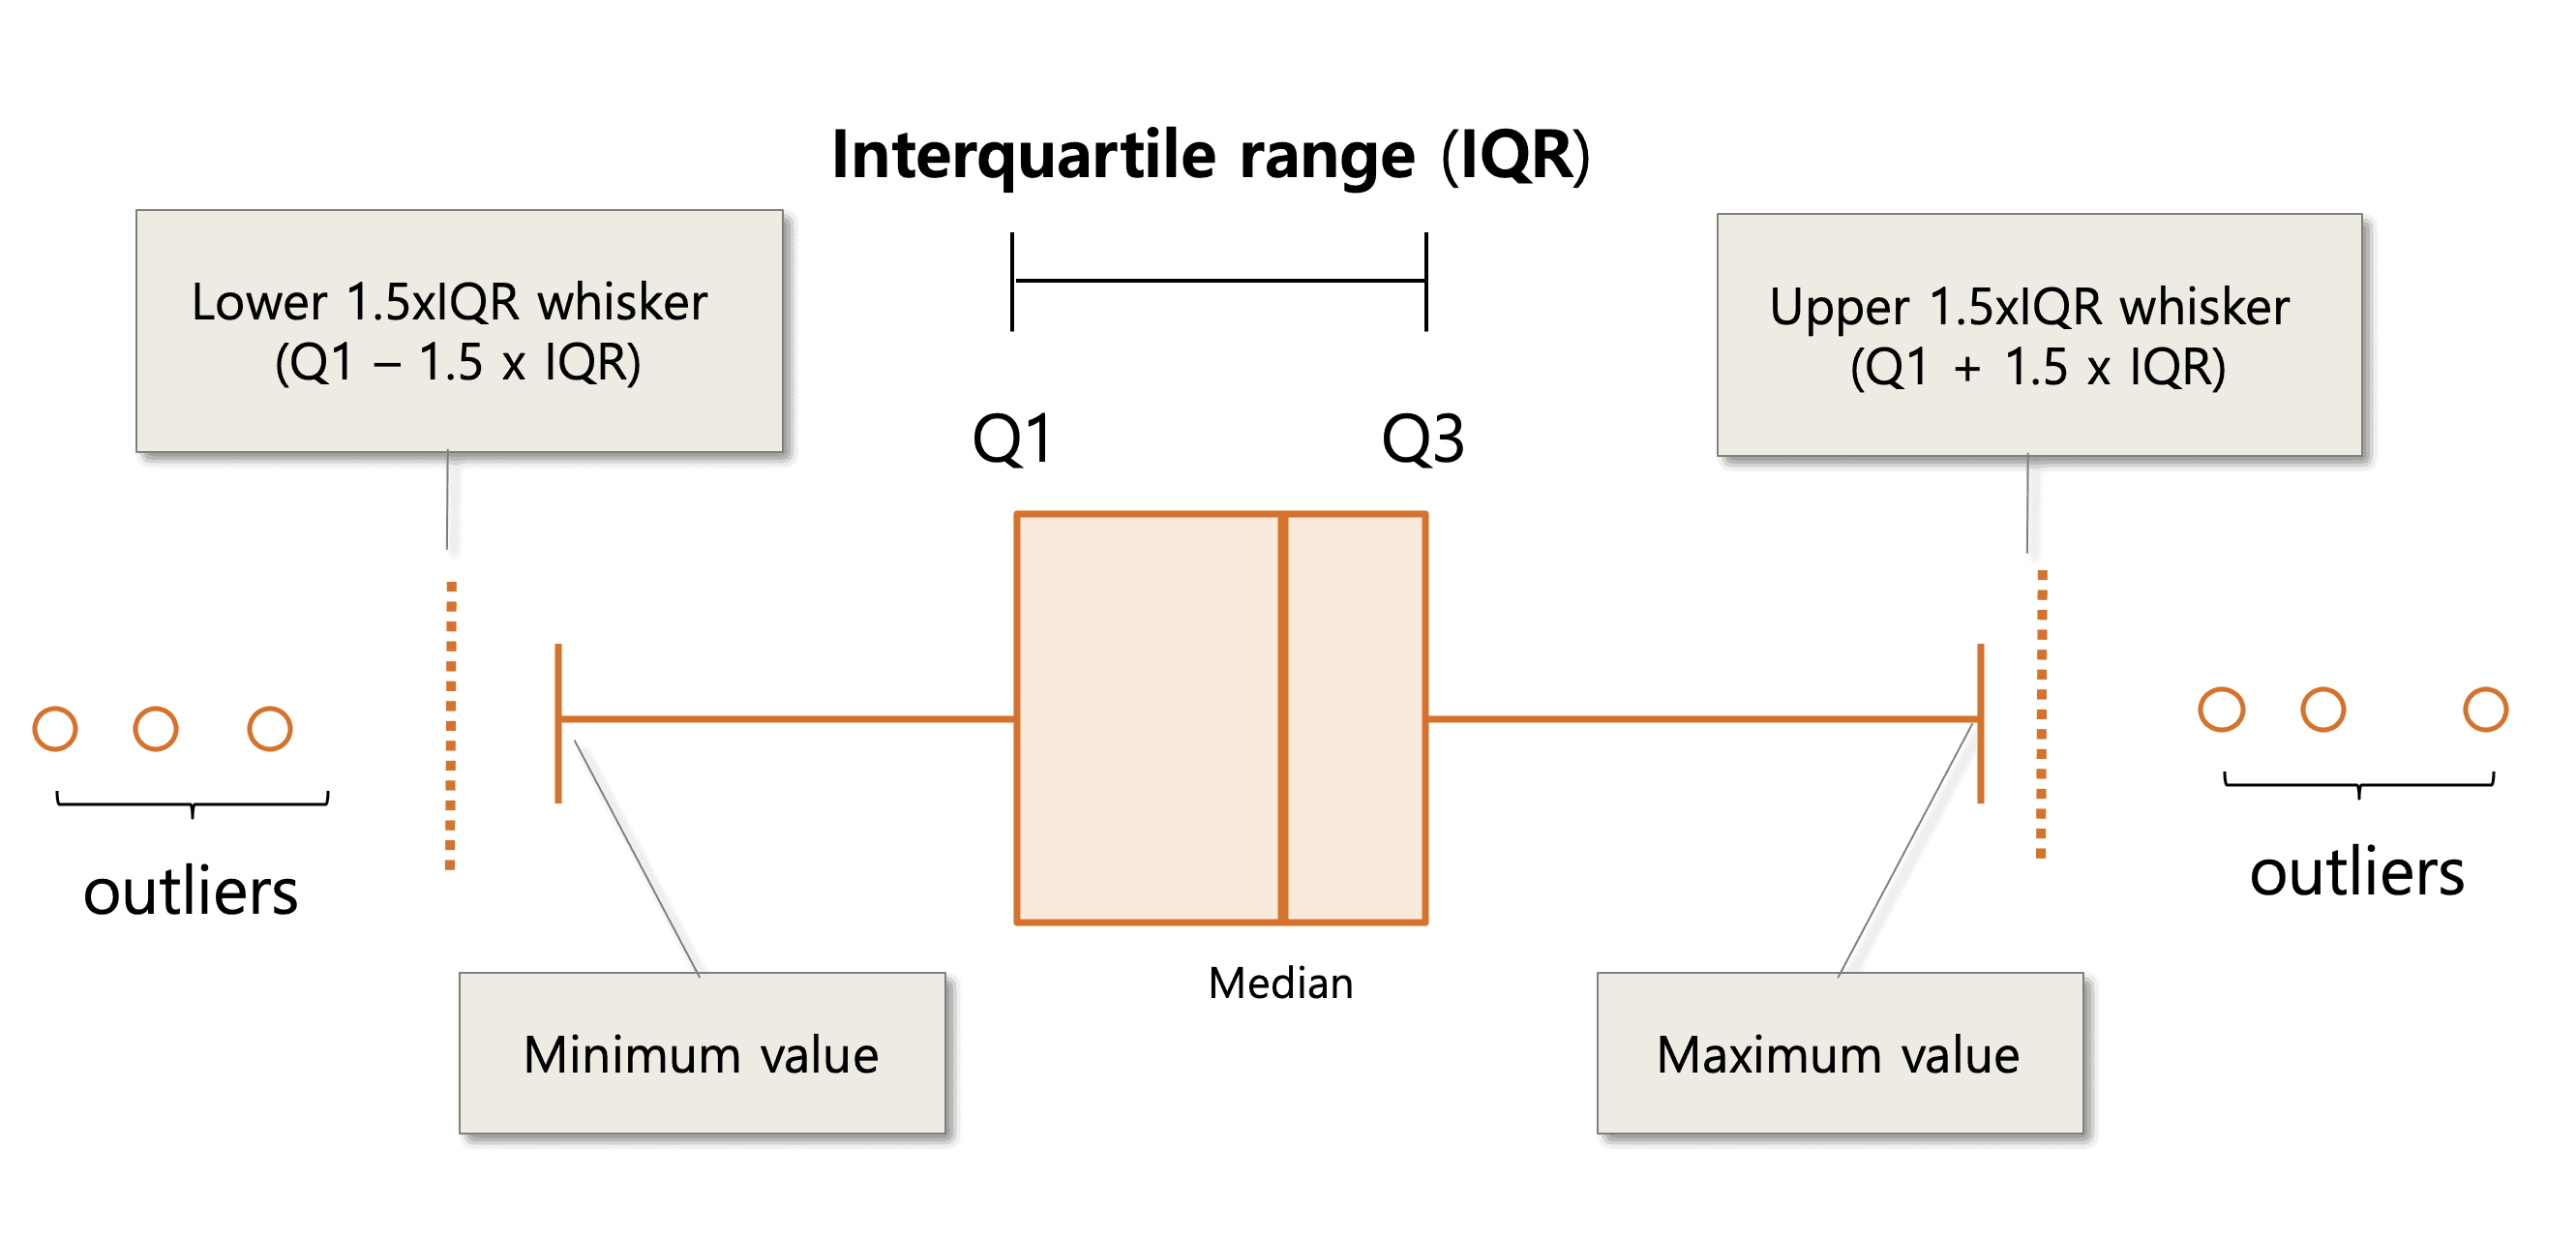

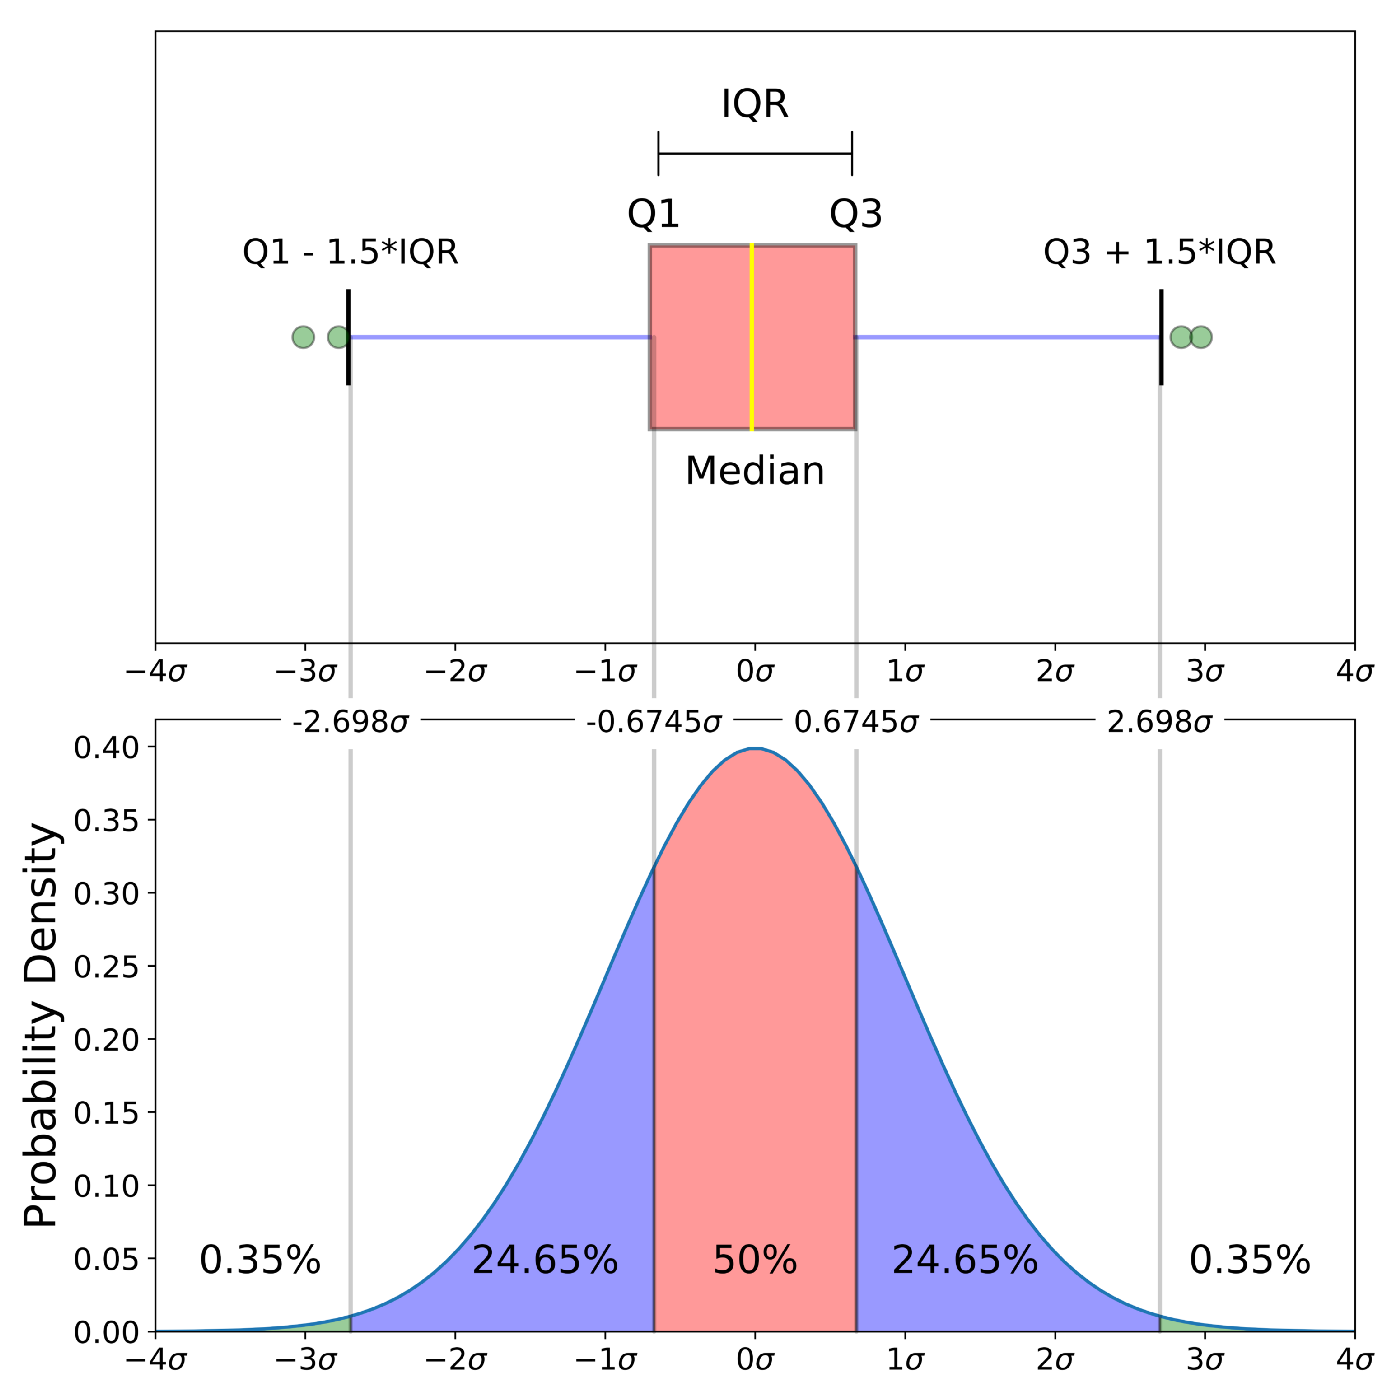

<strong> The lower whisker is the minimum of the min value or q1 - 1.5(IQR)</strong>

<AxesSubplot:xlabel='Income'>

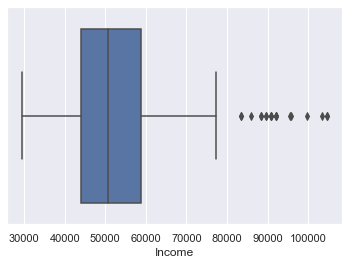

In [30]:
sns.boxplot(df1['Income'])

# we have a few outliers (above q3 + (1.5 * IQR))
# interquartile range = q3 - q1


<AxesSubplot:xlabel='Usage'>

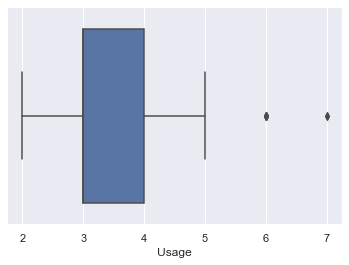

In [31]:
sns.boxplot(df1['Usage'])

<AxesSubplot:xlabel='Fitness'>

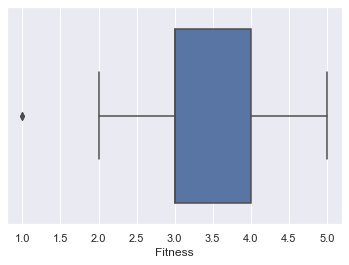

In [32]:
sns.boxplot(df1['Fitness'])

In [33]:
import xlwings as xw

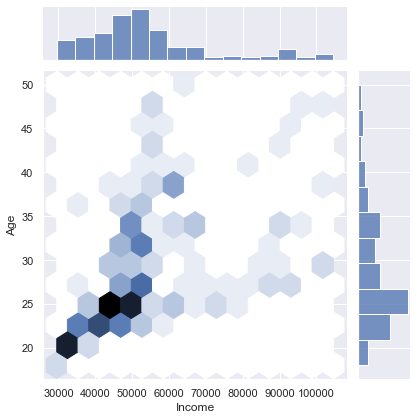

In [34]:
sns.jointplot(data = df1, x = 'Income', y = 'Age', kind="hex");

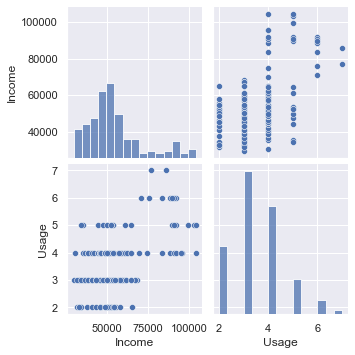

In [35]:
sns.pairplot(df1[['Product', 'Income', 'Usage']]);

<AxesSubplot:xlabel='Product', ylabel='Income'>

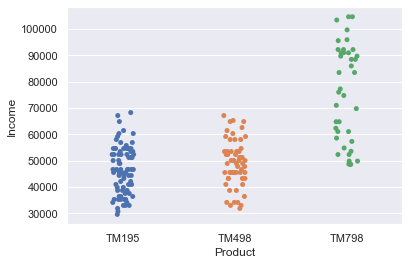

In [36]:
sns.stripplot(data = df1, x = 'Product', y = 'Income')

<AxesSubplot:xlabel='Product', ylabel='Income'>

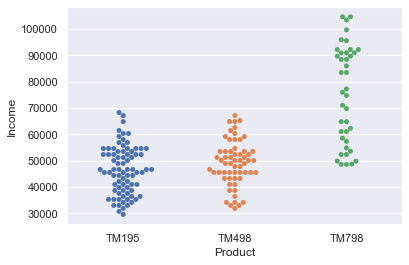

In [37]:
sns.swarmplot(data = df1, x = 'Product', y = 'Income')

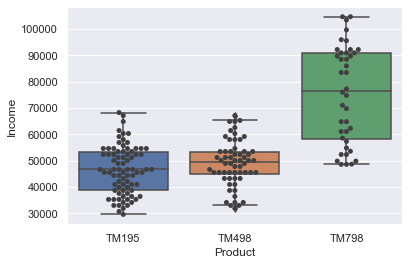

In [42]:
ax = sns.boxplot(x="Product", y="Income", data=df1)
ax = sns.swarmplot(x="Product", y="Income", data=df1, color="0.25")

In [89]:
df1.loc[df1['Product'] == 'TM798'].shape[0]

40

In [70]:
df1.loc[(df1['Income'] > 85000) & (df1['Product'] == 'TM798')]

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
160,TM798,27,Male,18,Single,4,3,88396,100
161,TM798,27,Male,21,Partnered,4,4,90886,100
162,TM798,28,Female,18,Partnered,6,5,92131,180
164,TM798,28,Male,18,Single,6,5,88396,150
166,TM798,29,Male,14,Partnered,7,5,85906,300
167,TM798,30,Female,16,Partnered,6,5,90886,280
168,TM798,30,Male,18,Partnered,5,4,103336,160
169,TM798,30,Male,18,Partnered,5,5,99601,150
170,TM798,31,Male,16,Partnered,6,5,89641,260
171,TM798,33,Female,18,Partnered,4,5,95866,200


In [65]:
df1.loc[(df1['Income'] > 85000) & (df1['Product'] == 'TM798') & (df1['Gender'] == 'Female')]

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
162,TM798,28,Female,18,Partnered,6,5,92131,180
167,TM798,30,Female,16,Partnered,6,5,90886,280
171,TM798,33,Female,18,Partnered,4,5,95866,200


In [83]:
# Let's check the correlation between our variables
# corr() method will ignore nun-numeric values


df1.corr()

,Age,Education,Usage,Fitness,Income,Miles
Age,1.000000,0.280496,0.015064,0.061105,0.513414,0.036618
Education,0.280496,1.000000,0.395155,0.410581,0.625827,0.307284
Usage,0.015064,0.395155,1.000000,0.668606,0.519537,0.759130
Fitness,0.061105,0.410581,0.668606,1.000000,0.535005,0.785702
Income,0.513414,0.625827,0.519537,0.535005,1.000000,0.543473
Miles,0.036618,0.307284,0.759130,0.785702,0.543473,1.000000


## Notes on Correlation

Correlation can range from -1 to 1, with 1 being "perfect correlation". What constitutes "good correlation" is entirely dependent on the use case. In our case, we will assume that +/-0.6 constitutes significant correlation. 

From our correlation chart, we can see that miles ran and fitness are correlated, meaning that as one goes up so does the other. This makes intuitive sense: the more miles logged should increase one's fitness level. 

In [108]:
# What if we need to access particular rows? 
# We can accomplish that by using the loc attribute

print(df1.loc[[0]]) # returns the first row

  Product  Age Gender  Education MaritalStatus  Usage  Fitness  Income  Miles
0   TM195   18   Male         14        Single      3        4   29562    112


In [99]:
df1.loc[[0]] # returns the first row but in a df format

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,18,Male,14,Single,3,4,29562,112


In [90]:
# When using [], the result is in a Pandas df

type(df1.loc[[0]])

pandas.core.frame.DataFrame

In [96]:
df1.loc[[0]].T # returns the above format, transposed

# don't get confused here - the column names are 
# in the place where row labels would typically be! 

,0
Product,TM195
Age,18
Gender,Male
Education,14
MaritalStatus,Single
Usage,3
Fitness,4
Income,29562
Miles,112


<AxesSubplot:ylabel='Frequency'>

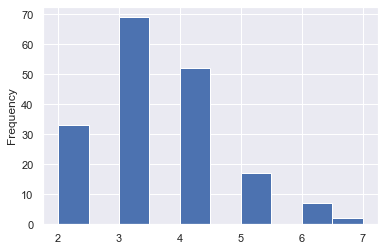

In [113]:
df1['Usage'].plot(kind = 'hist')

<AxesSubplot:ylabel='Frequency'>

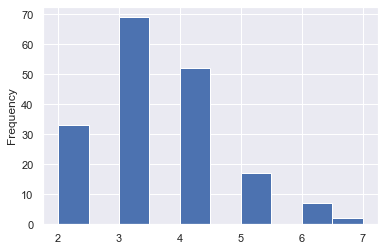

In [115]:
df1.Usage.plot(kind = 'hist')

<AxesSubplot:ylabel='Frequency'>

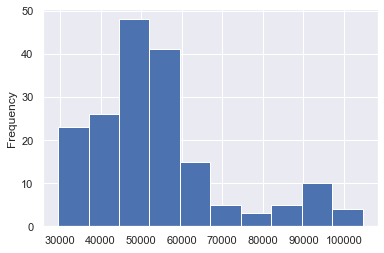

In [118]:
df1['Income'].plot(kind = 'hist')

In [98]:
#df1['Income'].gt(85000)

In [99]:
#df1['Income'].lt(85000)

In [121]:
df1.mean()

Age             28.788889
Education       15.572222
Usage            3.455556
Fitness          3.311111
Income       53719.577778
Miles          103.194444
dtype: float64

In [122]:
df1['Income'].mean()

53719.57777777778

In [124]:
df1['Income'].where(df1['Gender'] == 'Male')

0       29562.0
1       31836.0
2           NaN
3       32973.0
4       35247.0
5           NaN
6           NaN
7       32973.0
8       35247.0
9           NaN
10      36384.0
11          NaN
12          NaN
13          NaN
14      38658.0
15      40932.0
16          NaN
17      39795.0
18          NaN
19          NaN
20      38658.0
21      40932.0
22          NaN
23          NaN
24      45480.0
25      42069.0
26          NaN
27          NaN
28      45480.0
29          NaN
30          NaN
31      40932.0
32          NaN
33      43206.0
34          NaN
35          NaN
36      53439.0
37      51165.0
38          NaN
39      44343.0
40      50028.0
41          NaN
42      54576.0
43          NaN
44          NaN
45          NaN
46      52302.0
47          NaN
48      54576.0
49          NaN
50      68220.0
51          NaN
52          NaN
53      46617.0
54      54576.0
55      54576.0
56          NaN
57          NaN
58      52302.0
59          NaN
60          NaN
61      51165.0
62      

<AxesSubplot:xlabel='Usage', ylabel='Fitness'>

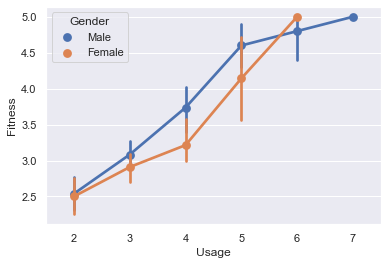

In [130]:
sns.pointplot(data = df1, x = 'Usage', y = 'Fitness', hue = 'Gender')

<AxesSubplot:xlabel='Usage', ylabel='Fitness'>

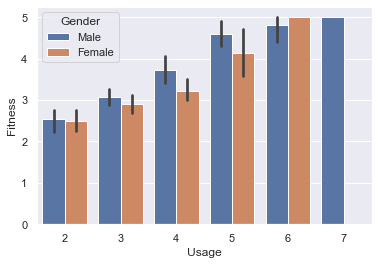

In [132]:
sns.barplot(data = df1, x = 'Usage', y = 'Fitness', hue = 'Gender')

<AxesSubplot:xlabel='Usage', ylabel='Fitness'>

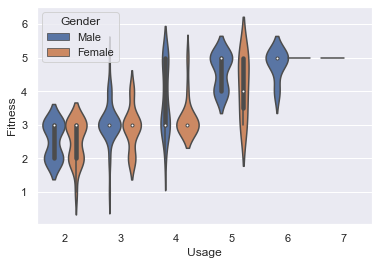

In [134]:
sns.violinplot(data = df1, x = 'Usage', y = 'Fitness', hue = 'Gender')

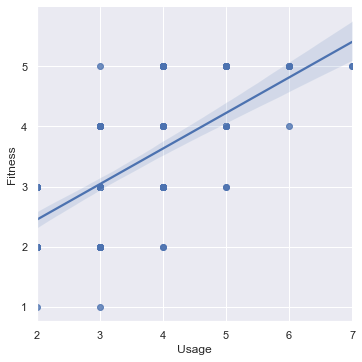

In [136]:
sns.lmplot(y = 'Fitness', x = 'Usage', data = df1)

In [137]:
#Installation step 
#!pip install pandas-profiling
#or 
import sys
!{sys.executable} -m pip install pandas-profiling

  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27085 sha256=8daed2dce765a2bca81eec8701a14e320a7471f068a38e9ebfc655ce3fd91e36
  Stored in directory: c:\users\frank_sellhausen\appdata\local\pip\cache\wheels\23\14\6e\4be5bfeeb027f4939a01764b48edd5996acf574b0913fe5243
  Created wheel for imagehash: filename=ImageHash-4.2.1-py2.py3-none-any.whl size=295198 sha256=79fb124e482d5cfa2837720d88e1040b7c7065883c7bcfbc0793f954b5b0cb25
  Stored in directory: c:\users\frank_sellhausen\appdata\local\pip\cache\wheels\48\a1\7f\096c1269d6bf78d4768180602579b35a1e8cb1250bb4b40c74
Successfully built htmlmin imagehash


In [138]:
import pandas_profiling

In [139]:
pandas_profiling.ProfileReport(df1)

Summarize dataset:   0%|          | 0/22 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [140]:
pandas_profiling.ProfileReport(df1).to_file("output.html")


Summarize dataset:   0%|          | 0/22 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [61]:
df1.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,18,Male,14,Single,3,4,29562,112
1,TM195,19,Male,15,Single,2,3,31836,75
2,TM195,19,Female,14,Partnered,4,3,30699,66
3,TM195,19,Male,12,Single,3,3,32973,85
4,TM195,20,Male,13,Partnered,4,2,35247,47


In [65]:
# what if we wanted to promote an increase of 10% in miles ran?
# how can we include a target miles column? 
df1['Target Miles'] = df1['Miles'] * 1.10

In [66]:
df1.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Target Miles
0,TM195,18,Male,14,Single,3,4,29562,112,123.2
1,TM195,19,Male,15,Single,2,3,31836,75,82.5
2,TM195,19,Female,14,Partnered,4,3,30699,66,72.6
3,TM195,19,Male,12,Single,3,3,32973,85,93.5
4,TM195,20,Male,13,Partnered,4,2,35247,47,51.7


In [71]:
# can we identify our top 5 runners, by mileage? 
df1.sort_values(['Miles'], ascending=False).head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Target Miles
173,TM798,35,Male,16,Partnered,4,5,92131,360,396.0
166,TM798,29,Male,14,Partnered,7,5,85906,300,330.0
167,TM798,30,Female,16,Partnered,6,5,90886,280,308.0
170,TM798,31,Male,16,Partnered,6,5,89641,260,286.0
155,TM798,25,Male,18,Partnered,6,5,75946,240,264.0


In [81]:
# medianMiles = df1['Miles'].median()
# aboveMedianMiles = df1['Miles'] > medianMiles
# #aboveMedianMiles #uncomment to return Bool values

In [82]:
aboveMedianMiles = df1['Miles'] > df1['Miles'].median()

In [83]:
medMileIncome = (aboveMedianMiles) & (df1['Income'] > df1['Income'].median())

In [85]:
df1['Fitness per Usage'] = df1['Fitness']/df1['Usage']

In [86]:
df1.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Target Miles,Fitness per Usage
0,TM195,18,Male,14,Single,3,4,29562,112,123.2,1.333333
1,TM195,19,Male,15,Single,2,3,31836,75,82.5,1.500000
2,TM195,19,Female,14,Partnered,4,3,30699,66,72.6,0.750000
3,TM195,19,Male,12,Single,3,3,32973,85,93.5,1.000000
4,TM195,20,Male,13,Partnered,4,2,35247,47,51.7,0.500000
